Index(['Diagnosis', 'Prediction', 'FEV1', 'FEV1/FVC', 'FEF2575', 'FEV1_pred',
       'FEV1/FVC_pred', 'FEF2575_pred', 'R5', 'R5_20', 'R20', 'X5', 'AX', 'TV',
       'R5_z_score', 'R5_20_z_score', 'R20_z_score', 'X5_z_score',
       'AX_z_score', 'ID', 'Trial', 'Age', 'Sex', 'Height', 'Weight',
       'OralCavity', 'OPJ', 'Glottis', 'Carina'],
      dtype='object')

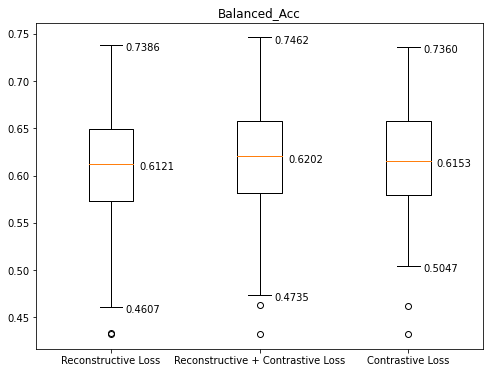

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

meta = pd.read_pickle('meta_1.pkl')
display(meta.columns)

metrics_test_1 = pd.read_pickle('metrics_test_1.pkl')
metrics_test_2 = pd.read_pickle('metrics_test_6.pkl')
metrics_test_3 = pd.read_pickle('metrics_test.pkl')
metrics_test_4 = pd.read_pickle('metrics_test_5.pkl')
metrics_test_5 = pd.read_pickle('metrics_test_7.pkl')
metrics = [metrics_test_3.metrics['Balanced_Acc'],
           metrics_test_4.metrics['Balanced_Acc'],
           metrics_test_5.metrics['Balanced_Acc']]
plt.figure(figsize=(8,6))
B = plt.boxplot(metrics, labels=['Reconstructive Loss', 'Reconstructive + Contrastive Loss', 'Contrastive Loss'])
med = [median.get_xydata() for median in B["medians"]]
whis = [whiskers.get_xydata() for whiskers in B["whiskers"]]
for item in med:
    plt.text(item[1][0]+0.04, item[1][1]-0.006, '%.4f' % item[1][1])
for item in whis:
    plt.text(item[1][0]+0.1, item[1][1]-0.006, '%.4f' % item[1][1])
plt.title('Balanced_Acc')
plt.show()

In [ ]:
df = pd.read_csv('data/AWARE-DeidentifiedPFTRepor_DATA_LABELS_2023-05-25_1047.csv')
display(df.columns)
target_idx = df['Baseline FEV1/FVC (%pred):']<80
# target_idx = df['Post-bronchodilator?']=='Yes'
# target_idx &= (df['Post FEV1 (%pred):'] - df['Baseline FEV1 (%pred):'])>12
# target_idx &= (df['Post FEV1 (liters):'] - df['Baseline FEV1 (liters):'])>0.2
target_idx &= df['Participant:']=='Asthma'
display(df['AWARE STUDY ID:'][target_idx].to_numpy())
display(df['Participant:'][target_idx].to_numpy())

1771 1209
1248 4307


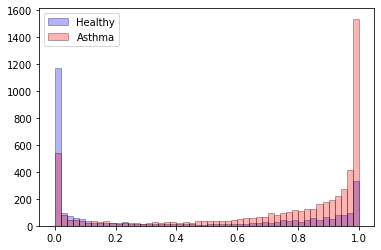

Acc: 0.7121265377855888
Sens: 0.7753375337533753
Spec: 0.5942953020134228
BalAcc: 0.6848164178833991


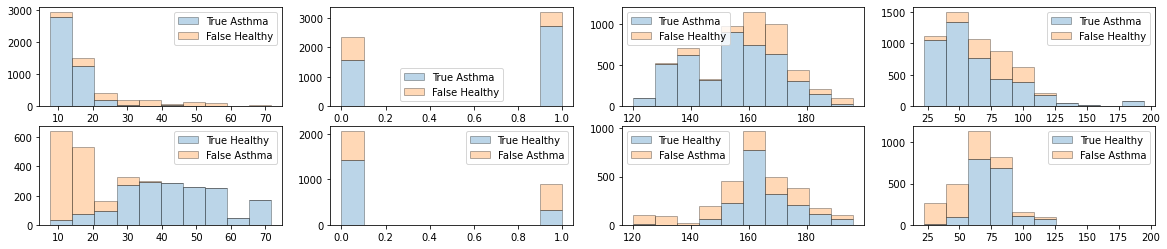

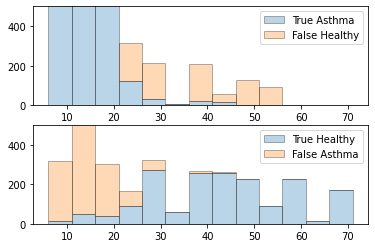

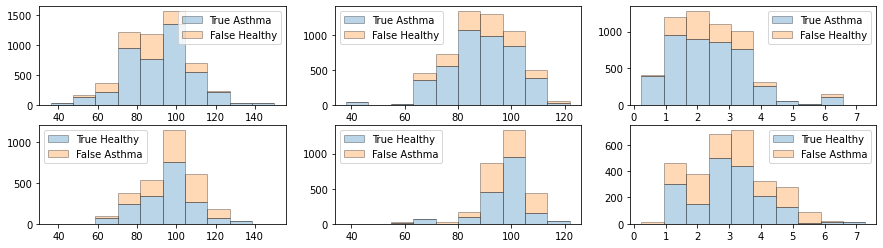

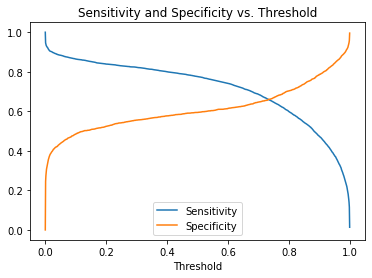

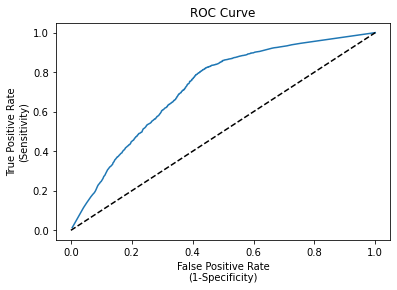

In [6]:
# meta = meta.loc[meta['ID'].isin(df['AWARE STUDY ID:'][target_idx].to_list())]
# display(meta)

idx_tp = (meta['Diagnosis']==1) & (meta['Prediction']>=0.5)
tp = idx_tp.sum()
idx_fp = (meta['Diagnosis']==0) & (meta['Prediction']>=0.5)
fp = idx_fp.sum()
idx_tn = (meta['Diagnosis']==0) & (meta['Prediction']<0.5)
tn = idx_tn.sum()
idx_fn = (meta['Diagnosis']==1) & (meta['Prediction']<0.5)
fn = idx_fn.sum()
print(tn, fp)
print(fn, tp)

plt.figure()
plt.hist(meta['Prediction'][meta['Diagnosis']==0], bins=50, range=(0,1), alpha = 0.3, color='b', edgecolor='k', linewidth=1)
plt.hist(meta['Prediction'][meta['Diagnosis']==1], bins=50, range=(0,1), alpha = 0.3, color='r', edgecolor='k', linewidth=1)
plt.legend(['Healthy', 'Asthma'])
plt.show()

# cross_entropy = -(y_true*np.log10(y_pred[1]) + (1-y_true)*np.log10(y_pred[0]))

# plt.figure()
# # plt.hist(cross_entropy, bins=np.logspace(np.log10(0.1),np.log10(10.0), 50), edgecolor='k', linewidth=1)
# plt.hist(cross_entropy, bins=50, edgecolor='k', linewidth=1)
# plt.legend(['Healthy', 'Asthma'])
# # plt.gca().set_xscale("log")
# plt.vlines(-np.log10(0.5), 0, 500, color='r')
# plt.show()

# y_pred = y_pred.idxmax(axis=1)

acc = (tp+tn)/(tp+tn+fp+fn)
sens = tp/(tp+fn)
spec = tn/(fp+tn)
print('Acc:', acc)
print('Sens:', sens)
print('Spec:', spec)
print('BalAcc:', (sens+spec)/2)

plt.figure(figsize=(20,4))
plt.subplot(2,4,1)
plt.hist(pd.concat([meta['Age'][idx_tp], meta['Age'][idx_fn]], axis=1), range=(meta['Age'].min(),meta['Age'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,4,5)
plt.hist(pd.concat([meta['Age'][idx_tn], meta['Age'][idx_fp]], axis=1), range=(meta['Age'].min(),meta['Age'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.subplot(2,4,2)
plt.hist(pd.concat([meta['Sex'][idx_tp], meta['Sex'][idx_fn]], axis=1), range=(meta['Sex'].min(),meta['Sex'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,4,6)
plt.hist(pd.concat([meta['Sex'][idx_tn], meta['Sex'][idx_fp]], axis=1), range=(meta['Sex'].min(),meta['Sex'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.subplot(2,4,3)
plt.hist(pd.concat([meta['Height'][idx_tp], meta['Height'][idx_fn]], axis=1), range=(meta['Height'].min(),meta['Height'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,4,7)
plt.hist(pd.concat([meta['Height'][idx_tn], meta['Height'][idx_fp]], axis=1), range=(meta['Height'].min(),meta['Height'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.subplot(2,4,4)
plt.hist(pd.concat([meta['Weight'][idx_tp], meta['Weight'][idx_fn]], axis=1), range=(meta['Weight'].min(),meta['Weight'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,4,8)
plt.hist(pd.concat([meta['Weight'][idx_tn], meta['Weight'][idx_fp]], axis=1), range=(meta['Weight'].min(),meta['Weight'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.show()

plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.hist(pd.concat([meta['Age'][idx_tp], meta['Age'][idx_fn]], axis=1), bins=list(range(6,76,5)), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.ylim((0,500))
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,1,2)
plt.hist(pd.concat([meta['Age'][idx_tn], meta['Age'][idx_fp]], axis=1), bins=list(range(6,76,5)), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.ylim((0,500))
plt.legend(['True Healthy', 'False Asthma'])
plt.show()

plt.figure(figsize=(15,4))
plt.subplot(2,3,1)
plt.hist(pd.concat([meta['FEV1_pred'][idx_tp], meta['FEV1_pred'][idx_fn]], axis=1), range=(meta['FEV1_pred'].min(),meta['FEV1_pred'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,3,4)
plt.hist(pd.concat([meta['FEV1_pred'][idx_tn], meta['FEV1_pred'][idx_fp]], axis=1), range=(meta['FEV1_pred'].min(),meta['FEV1_pred'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.subplot(2,3,2)
plt.hist(pd.concat([meta['FEV1/FVC_pred'][idx_tp], meta['FEV1/FVC_pred'][idx_fn]], axis=1), range=(meta['FEV1/FVC_pred'].min(),meta['FEV1/FVC_pred'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,3,5)
plt.hist(pd.concat([meta['FEV1/FVC_pred'][idx_tn], meta['FEV1/FVC_pred'][idx_fp]], axis=1), range=(meta['FEV1/FVC_pred'].min(),meta['FEV1/FVC_pred'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.subplot(2,3,3)
plt.hist(pd.concat([meta['FEF2575'][idx_tp], meta['FEF2575'][idx_fn]], axis=1), range=(meta['FEF2575'].min(),meta['FEF2575'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Asthma', 'False Healthy'])
plt.subplot(2,3,6)
plt.hist(pd.concat([meta['FEF2575'][idx_tn], meta['FEF2575'][idx_fp]], axis=1), range=(meta['FEF2575'].min(),meta['FEF2575'].max()), alpha = 0.3, stacked=True, edgecolor='k', linewidth=1)
plt.legend(['True Healthy', 'False Asthma'])
plt.show()

thre = np.zeros(1001)
sens = np.zeros(1001)
spec = np.zeros(1001)
for i in range(0,1001):
    idx_tp = (meta['Diagnosis']==1) & (meta['Prediction']>=i/1000)
    tp = idx_tp.sum()
    idx_fp = (meta['Diagnosis']==0) & (meta['Prediction']>=i/1000)
    fp = idx_fp.sum()
    idx_tn = (meta['Diagnosis']==0) & (meta['Prediction']<i/1000)
    tn = idx_tn.sum()
    idx_fn = (meta['Diagnosis']==1) & (meta['Prediction']<i/1000)
    fn = idx_fn.sum()
    thre[i] = i/1000
    sens[i] = tp/(tp+fn)
    spec[i] = tn/(fp+tn)
    
plt.figure()
plt.plot(thre, sens)
plt.plot(thre, spec)
plt.title('Sensitivity and Specificity vs. Threshold')
plt.legend(['Sensitivity', 'Specificity'])
plt.xlabel('Threshold')
plt.show()

plt.figure()
# skplt.metrics.plot_roc_curve(meta['Diagnosis'], outputs_cls)
plt.plot(1-spec, sens)
plt.plot([0,1], [0,1], '--k')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate\n(1-Specificity)')
plt.ylabel('True Positive Rate\n(Sensitivity)')
plt.show()

In [ ]:
df = pd.read_csv('data/AWARE_DATA_LABELS_2023-12-08_1611.csv')
print(df['Calculated age (years):'].std())
display(df.columns)